<a href="https://colab.research.google.com/github/myowon/-AI/blob/main/YOLO_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO_v3


In [ ]:
#Importing modules
import cv2
import numpy as np

In [ ]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames() #Names of all layers
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

1. YOLO모델 아키텍쳐와 사전 훈련된 가중치를 읽어온다.
2. 파일을 읽기 모드로 읽어와 앞뒤 공백을 제거 후, 리스트에 저장한다.
3. 출력 레이어의 인덱스를 찾고, layer_names 리스트에서 해당하는 레이어 이름을 추출한다. 추출된 레이어 이름은 output_layers 리스트에 저장된다.

  output_layers 리스트는 YOLO 알고리즘에서 객체 탐지 결과를 얻기 위해 사용된다.

  net.getUnconnectedOutLayers()를 통해 출력 레이어들의 인덱스를 얻어오고, layer_names를 이용하여 실제 레이어 이름으로 변환하여 output_layers에 저장하는 것이 일반적인 YOLO 객체 탐지 코드의 접근 방식입니다.



1. Lee la arquitectura del modelo YOLO y el peso pre-entrenado.
2. Lea el archivo en modo de lectura, elimine el espacio atrás y atrás y guárdalo en la lista.
3. Busca el índice de la capa de salida y extrae el nombre de la capa correspondiente de la lista de capas_name. El nombre de capa extraído se almacena en la lista de salida_layer.

  La lista output_layers es utilizada por el algoritmo YOLO para obtener resultados de detección de objetos

  Un enfoque común al código de detección de objetos YOLO es obtener índices de capas de salida a través de net.getUnconnectadoOutLayers(), convertirlos en nombres de capas reales usando los nombres de capas, y almacenarlos en output_layers.

In [ ]:
img = cv2.imread("1.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape



1. 이미지 파일을 읽어와 로드한다.
2. 이미지 크기를 조정한다.
3. 이미지의 높이, 너비 및 채널 수를 추출한다.



1. Lee y carga el archivo de imagen.
2. Ajuste el tamaño de la imagen.
3. Extrae la altura, la anchura y el número de canales de la imagen.

In [ ]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)



1. cv2.dnn.blobFromImage() 함수를 사용하여 이미지 전처리 진행
2. 전처리된 이미지(blob)를 YOLO 모델의 입력으로 설정
3. YOLO 모델을 순방향으로 실행하여 객체 검출 결과를 얻는다.



1. Proceda el pretratamiento de la imagen utilizando la función cv2.dn.blobFromImage ().
2. Configurar la imagen preprocesada como entrada del modelo YOLO
3. Ejecuta el modelo YOLO en la dirección correcta para obtener el resultado de detección de objetos.

In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores) #Select the class ID with the highest class probability
        confidence = scores[class_id]
        if confidence > 0.5: #If the reliability(confidence) is 0.5 or greater
            center_x = int(detection[0] * width) #Extract coordinate information (좌표 정보를 추출)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

YOLO 모델의 출력을 기반으로 객체 검출 결과를 추출하고 필터링하는 부분이다.

-> boxes, confidences, class_ids 리스트에는 객체 검출 결과로 추출된 경계 상자, 신뢰도, 클래스 인덱스가 각각 저장된다.

Es la parte que extrae y filtra los resultados de detección de objetos basados en la salida del modelo YOLO.

-> En la lista de cajas, condiciones, clase_ids, se almacenan las cajas de límite, fiabilidad e índices de clase extraídos como resultado de la detección de objetos, respectivamente.

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

Non-Maximum Suppression (NMS)을 사용하여 겹치는 경계 상자를 제거하는 부분이다.

Es parte de eliminar la caja de alerta que se superponen con la hipertensión pulmonar.

In [ ]:
from google.colab.patches import cv2_imshow

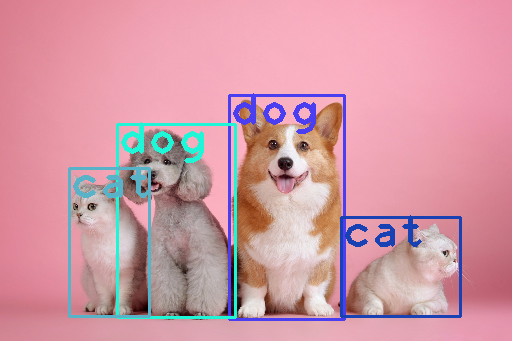

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

이미지에 감지된 객체들의 경계 상자와 클래스 레이블이 표시된 결과를 확인할 수 있다.

indexes 배열에 의해 최종 선택된 객체들만 시각화되며, 이를 통해 객체 검출 결과를 확인가능하다.

Puede confirmar los resultados de las etiquetas de clase y las cajas de límite de los objetos detectados en la imagen.

Sólo los objetos seleccionados finalmente por la disposición de indexes se visualizan, y esto permite verificar los resultados de detección de objetos.

In [ ]:
img2 = cv2.imread("2.jpg")
img2 = cv2.resize(img2, None, fx=0.4, fy=0.4)
height, width, channels = img2.shape

In [ ]:
blob2 = cv2.dnn.blobFromImage(img2, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob2)
outs2 = net.forward(output_layers)

In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs2:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

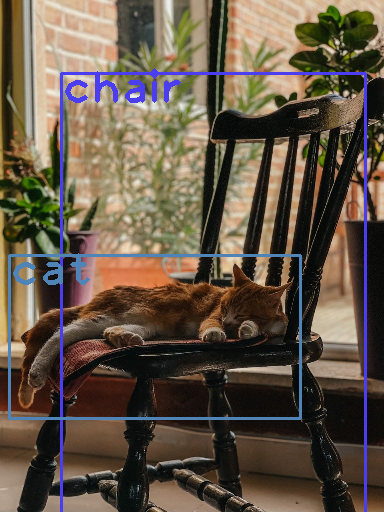

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img2, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img2, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img3 = cv2.imread("3.jpg")
img3 = cv2.resize(img3, None, fx=0.4, fy=0.4)
height, width, channels = img3.shape

In [ ]:
blob3 = cv2.dnn.blobFromImage(img3, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob3)
outs3 = net.forward(output_layers)

In [ ]:
class_ids = []
confidences = []
boxes = []
for out in outs3:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img3, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img3, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img3)
cv2.waitKey(0)
cv2.destroyAllWindows()